In [1]:
import tensorflow as tf_load_data
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = tf_load_data.keras.datasets.mnist.load_data()

In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
# 예제용 reshape
x_train, x_test = x_train/255.0, x_test/255.0   #Feature scaling 적용, 그대록 학습시 문제됨...

# [[], [], ...] --> [...]
x_train_rs = x_train.reshape(x_train.shape[0], 784).astype('float32')
x_test_rs = x_test.reshape(x_test.shape[0], 784).astype('float32')

# one hot encoding
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [4]:
print(x_train_rs.shape)
print(y_train_onehot.shape)
print(y_test_onehot.shape)
print(x_test_rs.shape)

(60000, 784)
(60000, 10)
(10000, 10)
(10000, 784)


In [5]:
print(y_test[0])
print(y_test_onehot[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [6]:
import numpy as np
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import matplotlib.pyplot as plt
import random

Instructions for updating:
non-resource variables are not supported in the long term


In [7]:
tf.set_random_seed(777)

In [8]:
#from tensorflow.examples.tutorials.mnist import input_data
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [9]:
# parameters
num_epochs = 15
batch_size = 100
#num_iterations = int(mnist.train.num_examples / batch_size)
num_iterations = int(x_train.shape[0] / batch_size)

In [10]:
# 기존 next_bath 함수 없어진듯...
def next_batch(num, data, labels):
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

Epoch: 0001, Cost: 2.838817197
Epoch: 0002, Cost: 1.061063932
Epoch: 0003, Cost: 0.849337753
Epoch: 0004, Cost: 0.726422139
Epoch: 0005, Cost: 0.660165201
Epoch: 0006, Cost: 0.617030874
Epoch: 0007, Cost: 0.579515050
Epoch: 0008, Cost: 0.562834766
Epoch: 0009, Cost: 0.556114095
Epoch: 0010, Cost: 0.514816322
Epoch: 0011, Cost: 0.491332874
Epoch: 0012, Cost: 0.485599038
Epoch: 0013, Cost: 0.472362699
Epoch: 0014, Cost: 0.460276226
Epoch: 0015, Cost: 0.460438907
Learning finished
Accuracy:  0.8931
Label:  [2]
Prediction:  [2]


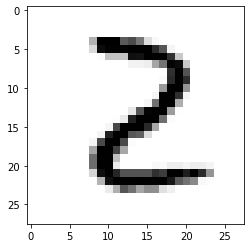

In [12]:
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs):
        avg_cost = 0

        for i in range(num_iterations):
            #batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            #_, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            batch_xs, batch_ys = next_batch(batch_size, x_train_rs, y_train_onehot)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            #print(cost_val)
            #print(num_iterations)
            avg_cost += cost_val / num_iterations

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finished")
    
    # Test the model using test sets
    print(
        "Accuracy: ",
        accuracy.eval(
            #session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
            session=sess, feed_dict={X: x_test_rs, Y: y_test_onehot}
        ),
    )
    
    # Get one and predict
    #r = random.randint(0, mnist.test.num_examples - 1)
    r = random.randint(0, x_test.shape[0] - 1)
    
    #print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print("Label: ", sess.run(tf.argmax(y_test_onehot[r : r + 1], 1)))
    print(
        "Prediction: ",
        #sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: x_test_rs[r : r + 1]}),
    )

    plt.imshow(
        #mnist.test.images[r : r + 1].reshape(28, 28),
        x_test_rs[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()